In [6]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import load_img


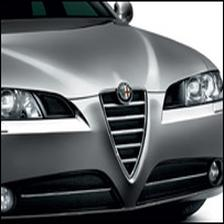

In [13]:
img1=load_img(r"C:\Users\Shyamal\Downloads\v_data\train\planes\68.jpg")
img2=load_img(r"C:\Users\Shyamal\Downloads\v_data\train\cars\70.jpg")
img2

In [14]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense

In [15]:
img_width=224
img_height=224
train_data=r"C:\Users\Shyamal\Downloads\v_data\train"
test_data=r"C:\Users\Shyamal\Downloads\v_data\test"
train_samples=400
test_samples=100
input_shape=(img_width,img_height,3)


In [16]:
#model define
model=Sequential()
model.add(Conv2D(32,(2,2),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(2,2),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(2,2),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 223, 223, 32)      416       
                                                                 
 activation_5 (Activation)   (None, 223, 223, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 110, 110, 32)      4128      
                                                                 
 activation_6 (Activation)   (None, 110, 110, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 55, 55, 32)        0         
 g2D)                                                 

In [23]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


In [26]:
train_data=ImageDataGenerator(rescale=1./255)
test_data=ImageDataGenerator(rescale=1./255)
train_data_load=train_data.flow_from_directory(
    "C:/Users/Shyamal/Downloads/v_data/train",
    target_size=(img_width,img_height),
    batch_size=20,
    class_mode='binary')
test_data_load=test_data.flow_from_directory(
    "C:/Users/Shyamal/Downloads/v_data/test",
    target_size=(img_width,img_height),
    batch_size=20,
    class_mode='binary')

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [27]:
model.fit_generator(
    train_data_load,
    epochs=5,
    validation_data=test_data_load,)

C:\Users\Shyamal\AppData\Local\Temp\ipykernel_18272\163047971.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/5
20/20 [==============================] - 22s 946ms/step - loss: 0.8566 - accuracy: 0.5550 - val_loss: 0.5984 - val_accuracy: 0.8500
Epoch 2/5
20/20 [==============================] - 15s 746ms/step - loss: 0.5576 - accuracy: 0.7225 - val_loss: 0.4965 - val_accuracy: 0.7700
Epoch 3/5
20/20 [==============================] - 15s 736ms/step - loss: 0.4423 - accuracy: 0.8100 - val_loss: 0.2846 - val_accuracy: 0.9000
Epoch 4/5
20/20 [==============================] - 15s 746ms/step - loss: 0.3483 - accuracy: 0.8775 - val_loss: 0.3600 - val_accuracy: 0.8400
Epoch 5/5
20/20 [==============================] - 15s 746ms/step - loss: 0.2576 - accuracy: 0.9050 - val_loss: 0.3048 - val_accuracy: 0.8900


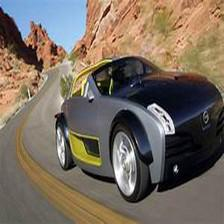

In [87]:
img2


In [93]:
i=np.array(img1)

In [89]:
i.shape

(224, 224, 3)

In [94]:
i=i.reshape(1,224,224,3)

In [91]:
i

array([[[[131, 168, 223],
         [118, 157, 212],
         [111, 154, 207],
         ...,
         [146, 107,  68],
         [151, 111,  75],
         [155, 115,  79]],

        [[122, 158, 216],
         [120, 159, 214],
         [117, 160, 215],
         ...,
         [130,  91,  52],
         [136,  96,  60],
         [150, 110,  74]],

        [[110, 146, 206],
         [117, 156, 213],
         [118, 163, 220],
         ...,
         [128,  89,  50],
         [133,  94,  55],
         [151, 112,  73]],

        ...,

        [[ 96,  96,  88],
         [ 94,  94,  86],
         [ 93,  93,  85],
         ...,
         [115, 106, 101],
         [118, 109, 104],
         [120, 111, 106]],

        [[ 98,  98,  90],
         [ 97,  97,  89],
         [ 95,  95,  87],
         ...,
         [116, 107, 102],
         [118, 109, 104],
         [120, 111, 106]],

        [[103, 103,  95],
         [101, 101,  93],
         [100, 100,  92],
         ...,
         [116, 107, 102],
        

In [95]:
model.predict(i)

1/1 [==============================] - 0s 32ms/step


array([[1.]], dtype=float32)